**Facilities**

The data set we will be pulling from for this section is the 'City Facilities' CSV, which is data pulled from the Operations Management System for the Department of Public Works. This data set provides us with a number of useful categories: facility name, neighborhood, type of facility, logitude/latitude, and even images of each. We will mostly be using facility type and neighborhood, as these categories lend themselves the strongest to our mission of determining the best neighborhood in Pittsburgh.

Since we are juding the best neighborhood in pittsburgh based on the amount of public services the community in each neighborhood has access to, a data set containing all public facilities and the neighborhood they are located in is paramount to determining the best neighborhood. What follows is my preliminary analysis. 


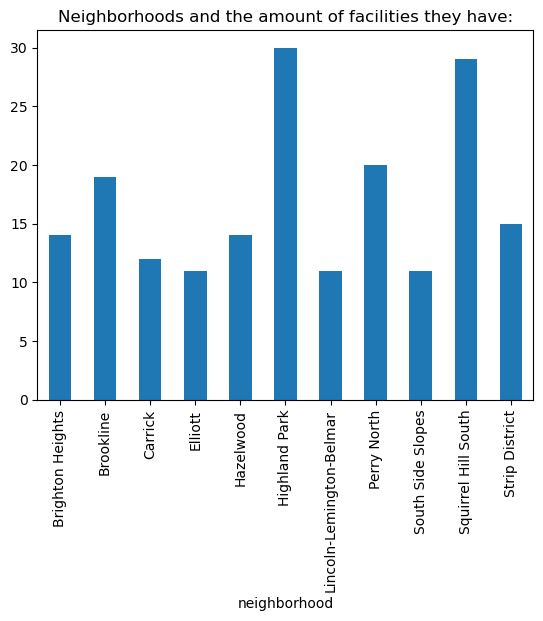

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
data = pd.read_csv("https://data.wprdc.org/datastore/dump/fbb50b02-2879-47cd-abea-ae697ec05170")
facility = data.groupby("neighborhood")
facility_amt = facility.size()
amt_query_mask = facility_amt > 10
facility_amt[amt_query_mask].plot.bar(title="Neighborhoods and the amount of facilities they have:")
# CHANGE AXIS LATER
plt.show()

Of all the neighborhoods in Pittsburgh, just 11 of them have more than 10 public facilities.

In case you don't want to crane your neck, those 2 big bars are Squirrel Hill South and Highland Park, both of which are coming in at a whopping [INSERT AMOUNT OF FACILITIES].

Below is a heat map, showing physically where these places are.

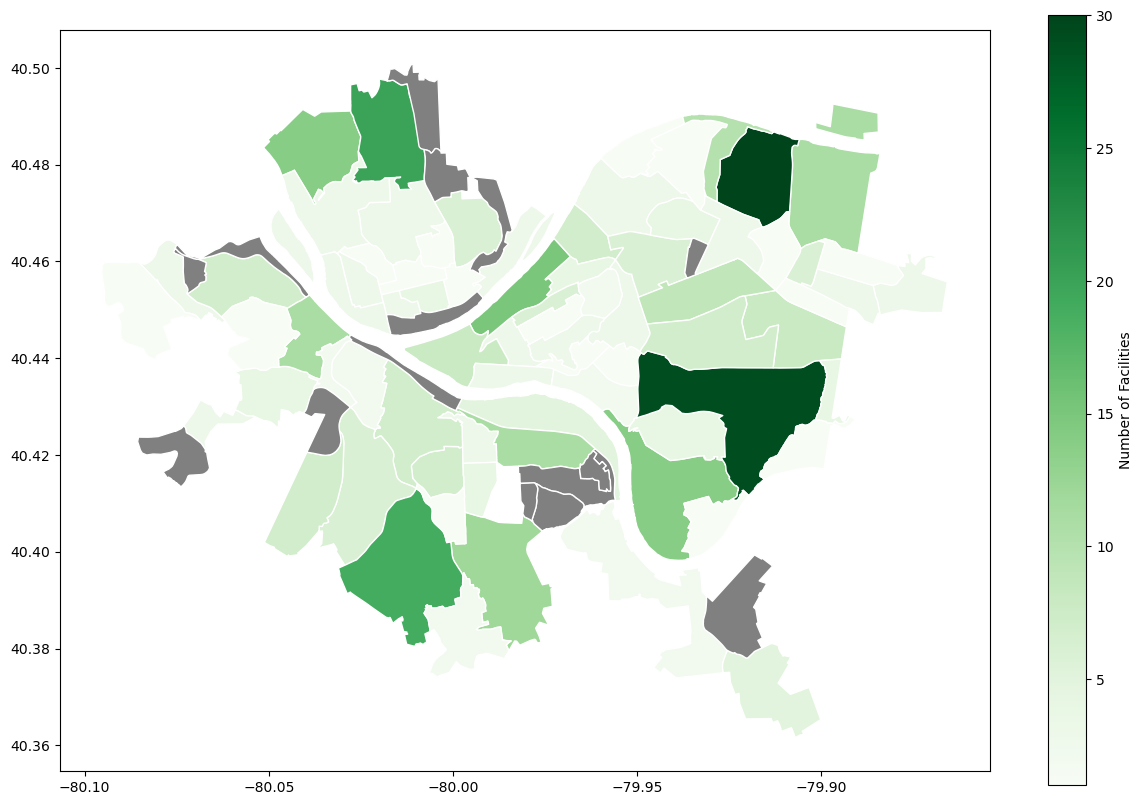

In [12]:
facility_amt.name = "facAmt"
#facility_amt.head()
facilities_map = neighborhoods.merge(facility_amt, how='left', left_on='hood', right_on='neighborhood')
pd.set_option('display.max_columns', None)

facilities_map.plot(column='facAmt', # set the data to be used for coloring
               cmap="Greens",              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Facilities"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "gray"} # set disctricts with no data to gray
               )
plt.show()

But what if some facilities are worth more than others? A police station typically will offer more public service than something like a bathroom. Let's see which neighborhood has the most of some different types of facilities. First, let's get a list of all the types of facilities there are. 

In [13]:
facility_type = data.groupby("type")
print(facility_type.size())

type
Activity         18
Cabin             4
Community         3
Concession       32
Dugout           42
Firehouse        28
Medic Station    11
OFFICE            2
Office           23
POLICE            7
Police            8
Pool             26
Pool Closed       4
Pool/Rec          6
Rec Center        6
Recycling         3
Restrooms        18
SERVICE           3
STORAGE           6
Salt Dome         8
Senior           16
Service          27
Shelter          62
Storage          24
TRAINING          2
Training          2
Utility          20
Vacant            1
dtype: int64


Some of these definately look like they are more important than others. Let's look at 5 main ones: police stations, fire houses, medic stations, pools, rec centers, and shelters. This is a good combination of practical facilities like the police and recreational ones like a pool.

We'll go in order. First are the police stations.

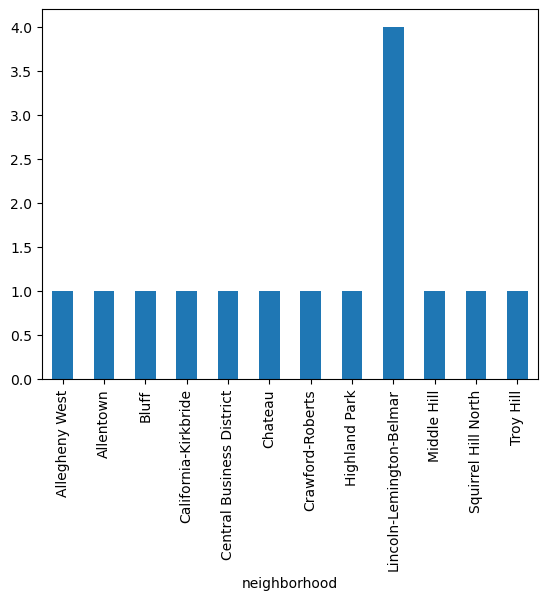

In [14]:
# trying to display the top neighborhood of each type of facility
# best to do one at a time, ill start w police

police_query_mask = data["type"] == "Police"
POLICE_query_mask = data["type"] == "POLICE"

police_facility = data[police_query_mask | POLICE_query_mask]
police_facility = police_facility.groupby("neighborhood").size()
police_facility.plot.bar()
plt.show()
#TODO: Label Graphs More

Out of the 12 neighborhoods with police stations, only one neighborhood has more than 1 station: Lincoln-Lemington-Belmar. If you remember, this neighborhood was also in the previous list of neighborhoods with more than 11 facilities. Maybe we'll keep an eye on this one.

Let's look at more data now, starting with firehouses.

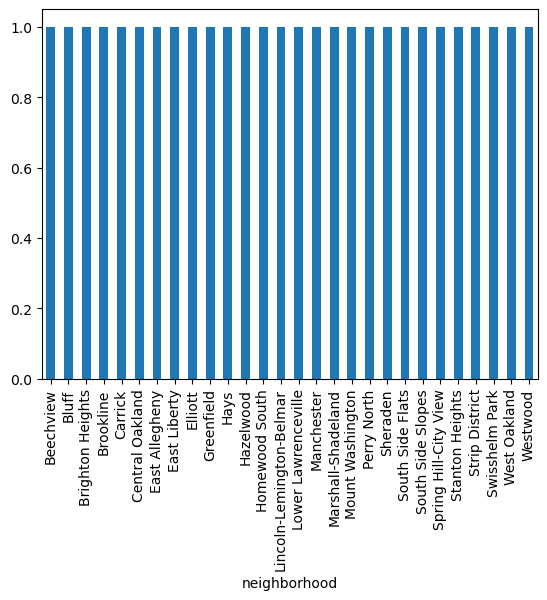

In [15]:
firehouse_query_mask = data["type"] == "Firehouse"

fire_facility = data[firehouse_query_mask]
fire_facility = fire_facility.groupby("neighborhood").size()
fire_facility.head(28)
fire_facility.plot.bar()
plt.show()
#TODO: Change scaling of Y axis 

Seems like a lot of places have fire houses, but every neighborhood that has one only has one. We'll keep in mind if the neighborhood has a firehouse when determining the best one.

Our next stop is the Medic Stations.

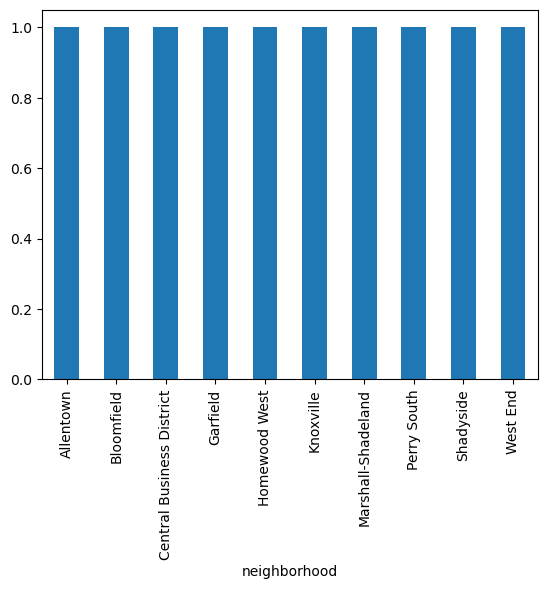

In [16]:
medic_query_mask = data["type"] == "Medic Station"

medic_facility = data[medic_query_mask]
medic_facility = medic_facility.groupby("neighborhood").size()
medic_facility.head(12)
medic_facility.plot.bar()
plt.show()
#TODO: Change scaling of Y axis 

Same story as before, but there's much less medic stations than fire houses.

Let's go onto the recreational ones, starting with pools. Since there is a category for pool/rec center in the data sheet, I will be counting each of these facilities for both pool and rec center.

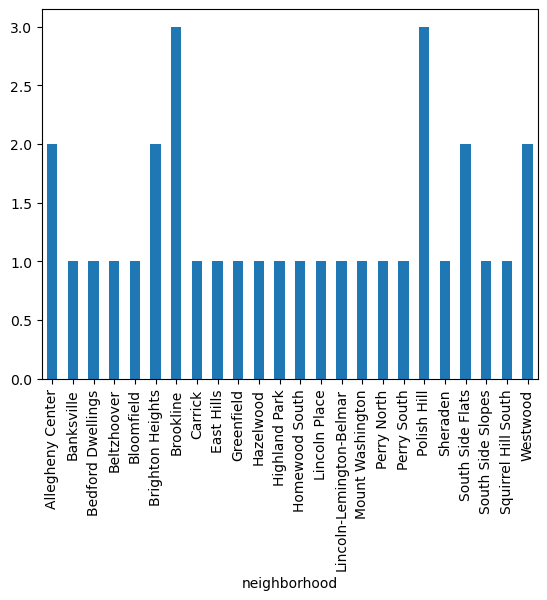

In [17]:
pool_query_mask = data["type"] == "Pool"
poolrec_query_mask = data["type"] == "Pool/Rec"

pool_facility = data[pool_query_mask | poolrec_query_mask]
pool_facility = pool_facility.groupby("neighborhood").size()
pool_facility.plot.bar()
plt.show()

This graph is a little messy, but it shows which ones have the most pools ...

Now, how does all of this add up? We saw the neighborhoods with the most amount of every facility, and neighborhoods with the most amount of a single facility, but we can do better.  

Let's make a graph, but taking out a bunch of the columns that aren't as important or impactful. Things like offices and storage areas, while nice for the people who use them, do not neccessarily directly benefit the community they are located in. So, let's remove every building that does not directly impact the community. Here are the categories we will remove: OFFICE, Office, Salt Dome, TRAINING, Training, Pool Closed, Vacant, Storage, STORAGE, SERVICE, Service

If you'd like a more in depth explanation on why I cut out some things but kept some others, feel free to ask. 

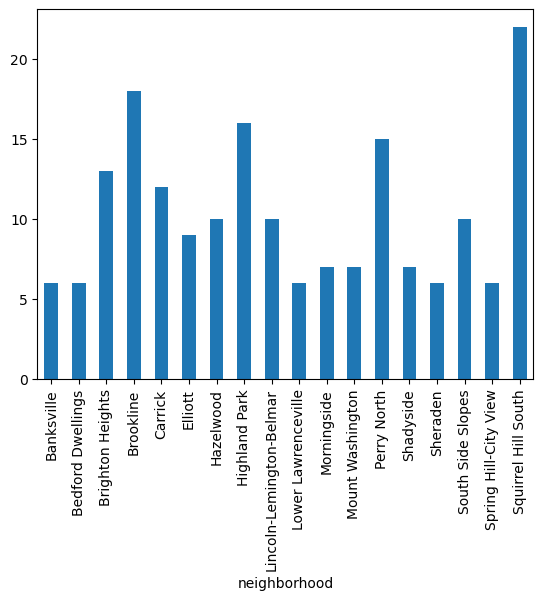

In [18]:
least_important = ["OFFICE", "Office", "Salt Dome", "TRAINING", "Training", "Pool Closed", "Vacant", "Storage", "STORAGE", "SERVICE", "Service"]
data_filtered = data[~data["type"].isin(least_important)]
data_filtered_grouped = data_filtered.groupby("neighborhood")
amt_query_mask_filtered = data_filtered_grouped.size() > 5
data_size_filtered = data_filtered_grouped.size()
data_size_filtered[amt_query_mask_filtered].plot.bar()
plt.show()

And, if we want to see just the MOST important buildings (the ones that we deem to provide the most value to the community), we can do that too. For this one, we'll remove these categories: Concession, Dugout, Shelter, Cabin, Restrooms, Utility

Again, if you want to know why we removed some things but not others, feel free to ask.

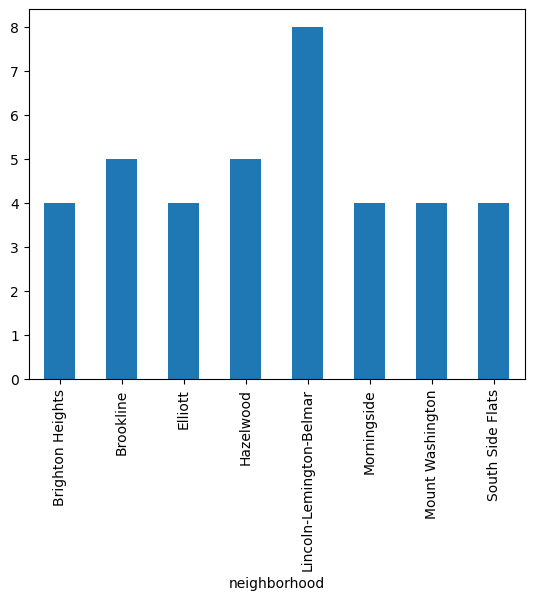

In [21]:
leastest_important = ["Concession", "Dugout", "Shelter", "Cabin", "Restrooms", "Utility"]
data_filtered_more = data_filtered[~data_filtered["type"].isin(leastest_important)]
#data_filtered_more.count().head()
data_filtered_grouped_again = data_filtered_more.groupby("neighborhood")
#data_filtered_grouped_again.size().head(30)
amt_query_mask_filtered_again = data_filtered_grouped_again.size() > 3
data_size_filtered_more = data_filtered_grouped_again.size()
data_size_filtered_more[amt_query_mask_filtered_again].plot.bar()
plt.show()

With just the categories that we have deemed most important, these are top neighborhoods. These neighborhoods have 3 or more important public facilities. As you can see, Lincoln-Lemington-Belmar is the community with the greatest number of relevent buildings. Some of these top neighborhoods also have a lot of important buildings, like __ having a lot of __. This isn't the only data we are judging these neighborhoods on, though; there are data sets that will give us a clearer picture on which neighborhood is the best one.

Let's see what Lincoln-Lemington-Belmar has to offer.


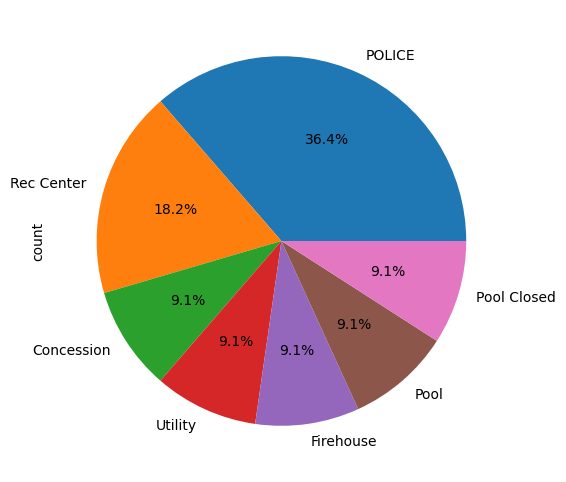

In [119]:
lincoln_data = data[data["neighborhood"]  == "Lincoln-Lemington-Belmar"]
type_counts = lincoln_data["type"].value_counts()
plt.figure(figsize=(6, 6))
type_counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

In [1]:
brookline_data = data_filtered[data_filtered["neighborhood"]  == "Brookline"]
type_counts = brookline_data["type"].value_counts()
plt.figure(figsize=(6, 6))
type_counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

NameError: name 'data_filtered' is not defined

In [2]:
brookline_data = data[data["neighborhood"]  == "Brookline"]
type_counts = brookline_data["type"].value_counts()
plt.figure(figsize=(6, 6))
type_counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

NameError: name 'data' is not defined

Here are some geopandas maps of the important facilities, filtered 0, 1, then 2 times:

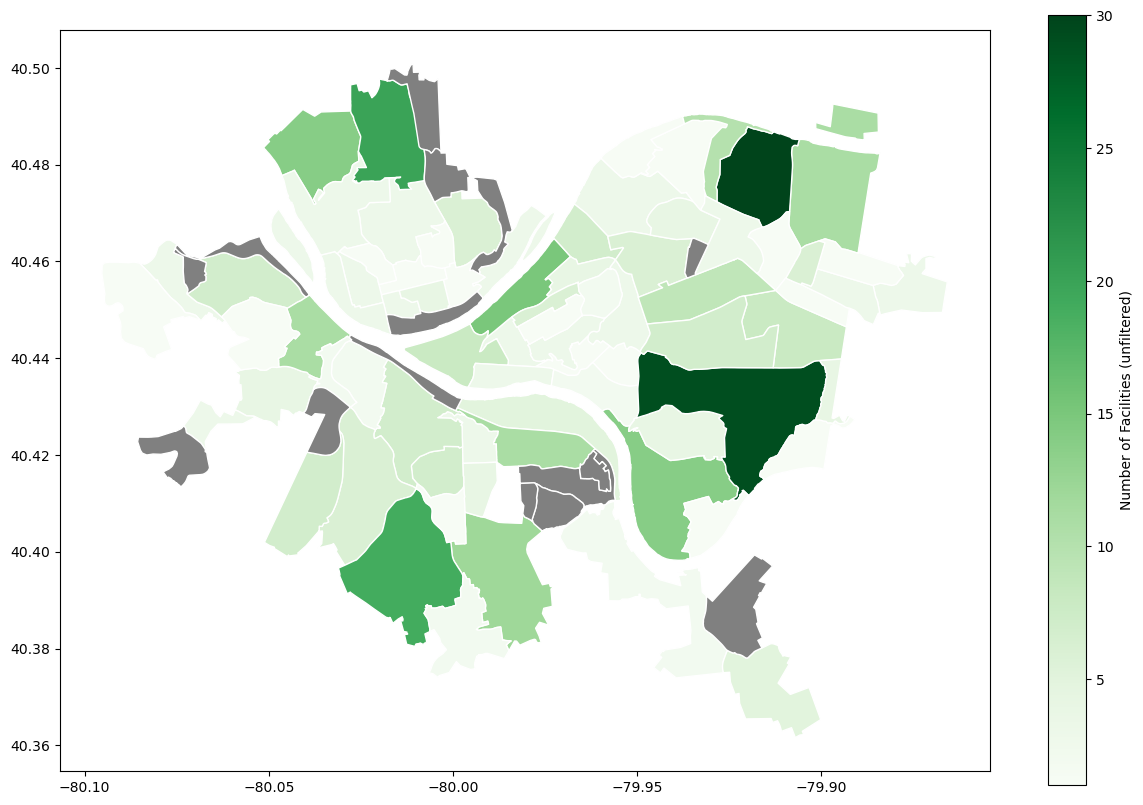

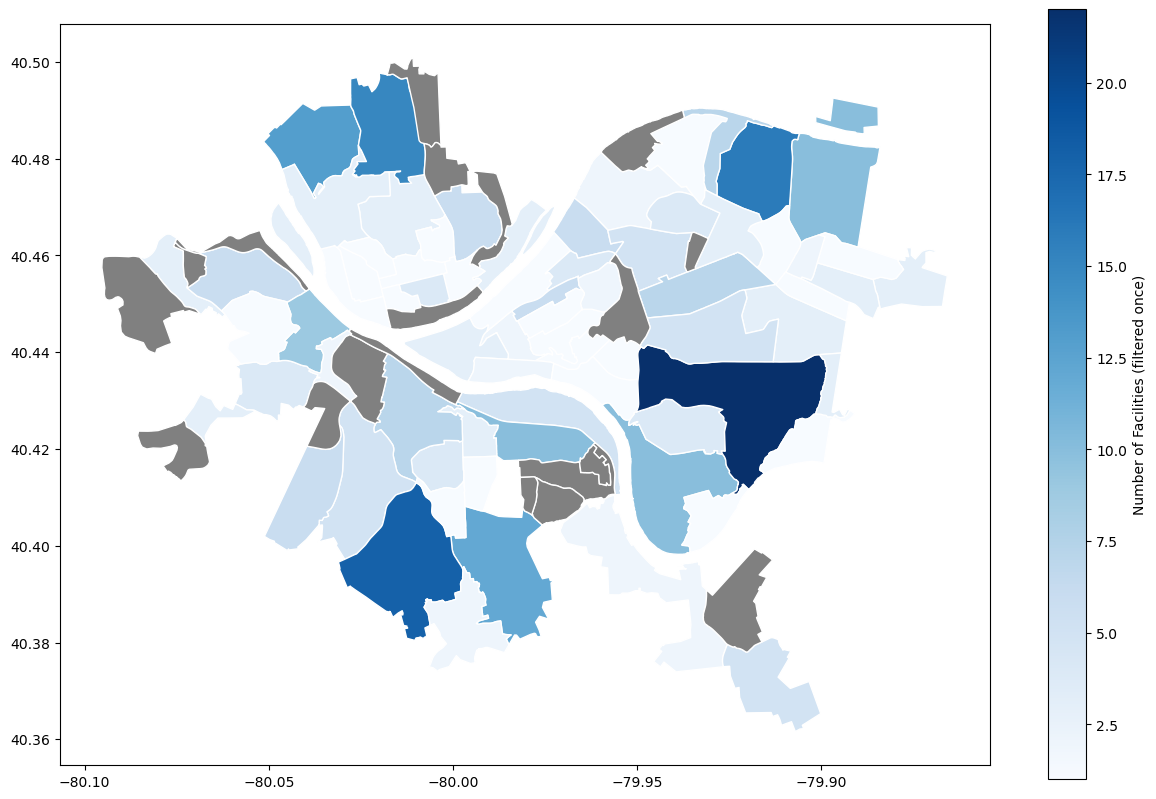

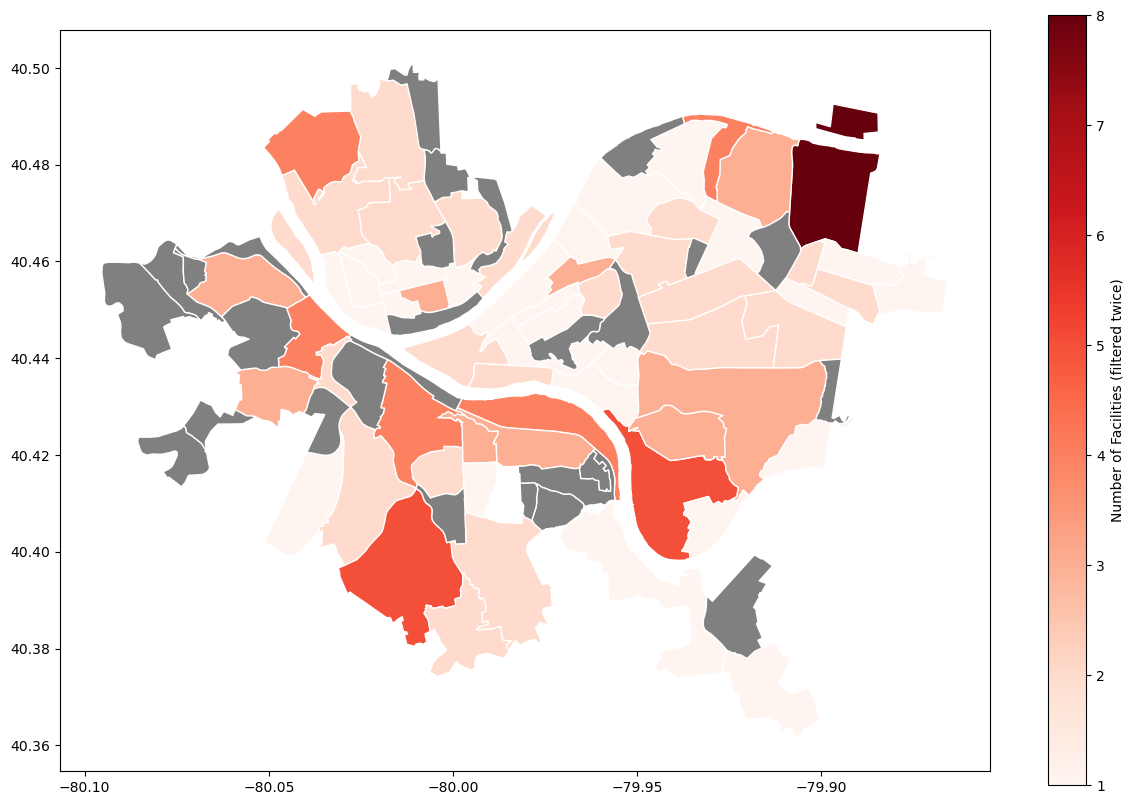

In [64]:
facility_amt.name = "facAmt"
facilities_map = neighborhoods.merge(facility_amt, how='left', left_on='hood', right_on='neighborhood')
pd.set_option('display.max_columns', None)
facilities_map.plot(column='facAmt', # set the data to be used for coloring
               cmap="Greens",              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Facilities (unfiltered)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "gray"} # set disctricts with no data to gray
               )
plt.show()
data_size_filtered.name = "DSF"
facilities_map = neighborhoods.merge(data_size_filtered, how='left', left_on='hood', right_on='neighborhood')
pd.set_option('display.max_columns', None)

facilities_map.plot(column='DSF', # set the data to be used for coloring
               cmap="Blues",              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Facilities (filtered once)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "gray"} # set disctricts with no data to gray
               )

data_size_filtered_more.name = "DSF2"
facilities_map = neighborhoods.merge(data_size_filtered_more, how='left', left_on='hood', right_on='neighborhood')
pd.set_option('display.max_columns', None)

facilities_map.plot(column='DSF2', # set the data to be used for coloring
               cmap="Reds",              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Facilities (filtered twice)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "gray"} # set disctricts with no data to gray
               )
plt.show()

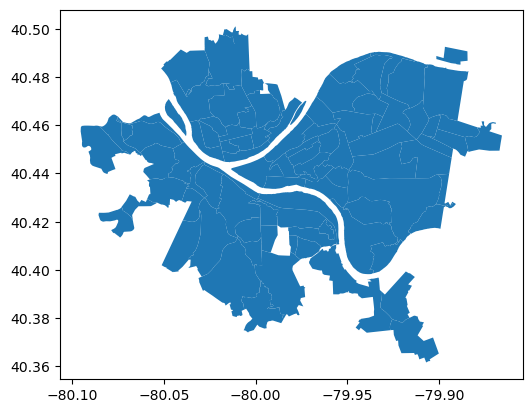

In [2]:
# SAMPLE GEOPANDAS (groupmates you can use this)

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot() # plot the geopandas dataframe
plt.show()

Test Stuff

In [5]:
eLiberty_data = data[data["neighborhood"]  == "East Liberty"]
type_counts = eLiberty_data["type"].value_counts()
type_counts.head()
#plt.figure(figsize=(6, 6))
#type_counts.plot(kind="pie", autopct="%1.1f%%")
#plt.show()

type
Utility      2
Firehouse    1
Name: count, dtype: int64

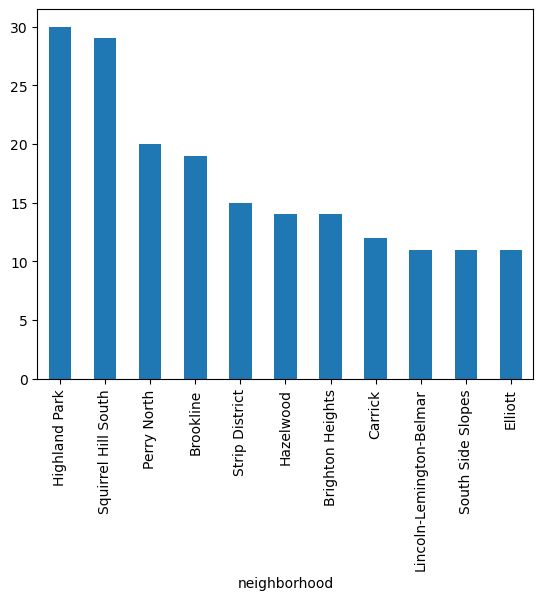

In [17]:
data_test = data["neighborhood"].value_counts().sort_values(ascending=False)
data_query_mask = data_test > 10
data_test[data_query_mask].plot.bar()
plt.show()